
# Stroke Predication

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
dataset = pd.read_csv("Stroke_data.csv")
# Top 5 records:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)

In [5]:
# Shape of dataset:
dataset.shape

(5110, 11)

In [6]:
# Description:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Datatypes:
dataset.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Filling NaN Values in BMI feature using mean:
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean())

In [10]:
# After filling Missing (NaN) Values in BMI feature:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# Target feature:
print("Stroke People     : ", dataset['stroke'].value_counts()[1])
print("Non-Stroke People : ", dataset['stroke'].value_counts()[0])

Stroke People     :  249
Non-Stroke People :  4861


- By seeing target feature, We clearly say we have **imbalenced dataset**.
- We Seen that in our **Gender** feature, we have only one **Other** gender, So instead of taking we drop that record.

In [12]:
# Dropping Other gender
Other_gender = dataset[dataset['gender'] == 'Other'].index[0]
dataset = dataset.drop(Other_gender, axis=0)

In [13]:
# Gender:
print("Male    : ", dataset['gender'].value_counts()[1])
print("female  : ", dataset['gender'].value_counts()[0])

Male    :  2115
female  :  2994


In [14]:
# Hypertension:
print("Hypertension People     : ", dataset['hypertension'].value_counts()[1])
print("Non-hypertension People : ", dataset['hypertension'].value_counts()[0])

Hypertension People     :  498
Non-hypertension People :  4611


In [15]:
# Heart Disease:
print("Heart Disease People     : ", dataset['heart_disease'].value_counts()[1])
print("Non-Heart Disease People : ", dataset['heart_disease'].value_counts()[0])

Heart Disease People     :  276
Non-Heart Disease People :  4833


In [16]:
# Single VS Married:
print("Single    : ", dataset['ever_married'].value_counts()[1])
print("Married   : ", dataset['ever_married'].value_counts()[0])

Single    :  1756
Married   :  3353


In [17]:
# Work Type:
print("Private         : ", dataset['work_type'].value_counts()[0])
print("Self-employed   : ", dataset['work_type'].value_counts()[1])
print("children        : ", dataset['work_type'].value_counts()[2])
print("Govt_job        : ", dataset['work_type'].value_counts()[3])
print("Never_worked    : ", dataset['work_type'].value_counts()[4])

Private         :  2924
Self-employed   :  819
children        :  687
Govt_job        :  657
Never_worked    :  22


In [18]:
# Residence Type:
print("Urban   : ", dataset['Residence_type'].value_counts()[0])
print("Rural   : ", dataset['Residence_type'].value_counts()[1])

Urban   :  2596
Rural   :  2513


In [19]:
# Smokers:
print("Never Smoked      : ", dataset['smoking_status'].value_counts()[0])
print("Unknown           : ", dataset['smoking_status'].value_counts()[1])
print("Formerly Smoked   : ", dataset['smoking_status'].value_counts()[2])
print("Smokes            : ", dataset['smoking_status'].value_counts()[3])

Never Smoked      :  1892
Unknown           :  1544
Formerly Smoked   :  884
Smokes            :  789


<Figure size 1080x864 with 0 Axes>

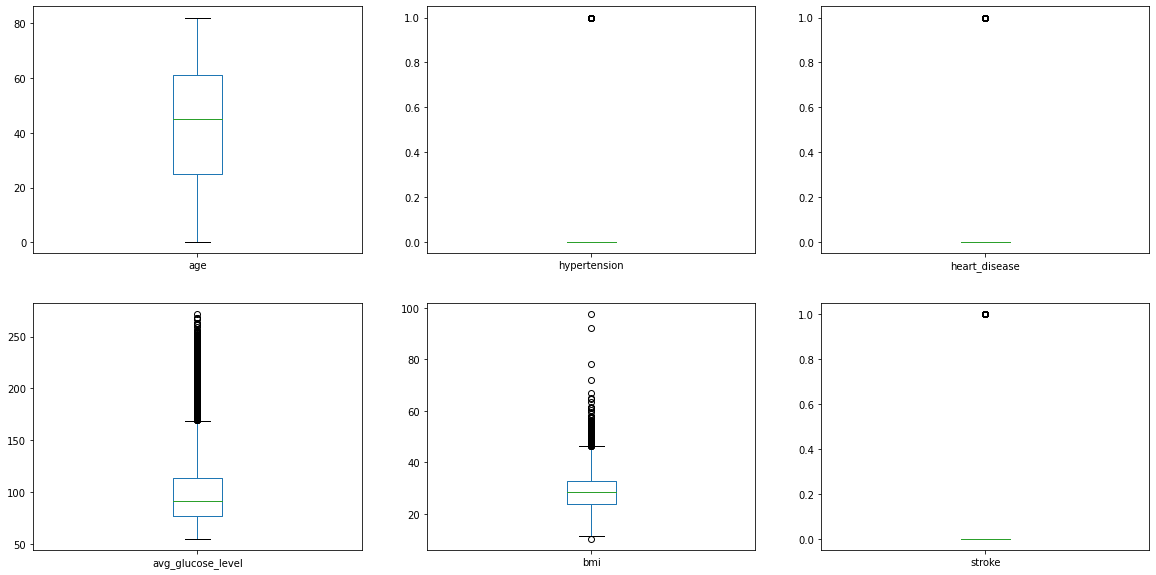

In [20]:
# Boxplot:
plt.figure(figsize=(15,12))
dataset.plot(kind='box', subplots=True, layout=(2,3), figsize=(20, 10))
plt.show()

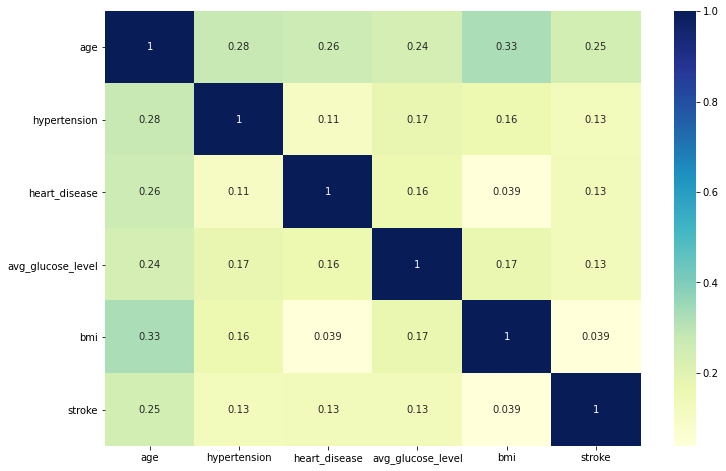

In [21]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [22]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


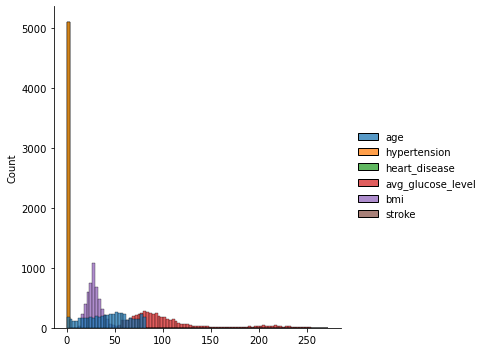

In [30]:
sns.displot(dataset)

In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [ ]:
dataset.head()

In [ ]:
a

In [ ]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

#plot graph of feature importances for better visualization
f=plt.figure(figsize=(8,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()
